# Loading and Exploring Log LAS Files With Python

## Introduction

Log ASCII Standard (LAS) files are a common file format storing and transferring well log data in the oil and gas industry. 

A LAS file is a file format that was developed by the Canadian Well Logging Society and it is used to store log curve data as well as information about the well.

This notebook illustrates how to load data in from a LAS file and carry out a basic QC of the data before plotting it on a log plot.

The well data used in this notebook are from the Maui gas field in Offshore Taranaki Basin, New Zealand

## Loading and Checking Data
The first step is to import the required libraries: pandas, matplotlib and LASIO.  
Lasio library is the most popular python library for reading .las files. More info on the library can be found at: https://lasio.readthedocs.io/en/latest/

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

To load our file in, use the `.read()` method from LASIO. Here, I will be loading Maui-1 .las file

In [34]:
las = lasio.read("/Users/isaacabrahamodeh/Desktop/Taranaki-wells/Taranaki/maui-1_raw.las")

## Loading and Checking Data
In this step we are going to load, check and explore the sections in a typical las file

In [35]:
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [36]:
las.sections['Version']

[HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS LOG ASCII STANDA"),
 HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One line per depth ste")]

Now that our file has been loaded, we can start investigating it's contents especially the header section which contained information about where the file originated from, such as the well name, location and what the depth range of the file covers, we can create a simple for loop to go over each header item. Using Python's f-string we can join the items together.

In [37]:
for item in las.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}): \t\t {item.value}")

START DEPTH (STRT): 		 119.0244
STOP DEPTH (STOP): 		 3500.3232
STEP (STEP): 		 0.1524
NULL VALUE (NULL): 		 -999.25
COMPANY (COMP): 		 
WELL (WELL): 		 Maui-1
FIELD (FLD): 		 
LOCATION (LOC): 		 
COUNTRY (CTRY): 		 
STATE (STAT): 		 
COUNTY (CNTY): 		 
SERVICE COMPANY (SRVC): 		 Shell BP & Todd Oil Services Ltd
DATE (DATE): 		 
API NUMBER (API): 		 
UNIQUE WELL ID (UWI): 		 100000022148
LATITUDE (LATI): 		 -39.6690752
LONGITUDE (LONG): 		 173.3100857


In [38]:
las.well.WELL.value

'Maui-1'

by looping through `las.curves`, we can quickly see and print the log curve mnemonic.

In [39]:
for curve in las.curves:
    print(curve.mnemonic)

DEPTH
GRXS
ILD
RHOB
SONI
SP
Z8XN


To see what curves are present within the las file, we can repeat the process with the Curve Item object and call upon the `unit` and `descr` functions to get info on the units and the curve's description.

In [44]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPTH, 	 Units: M, 	 Description: 
Curve: GRXS, 	 Units: GAPI, 	 Description: Converted from Geolog version 4.
Curve: ILD, 	 Units: OHMM, 	 Description: Converted from Geolog version 4.
Curve: RHOB, 	 Units: G/C3, 	 Description: Converted from Geolog version 4.
Curve: SONI, 	 Units: US/F, 	 Description: Converted from Geolog version 4.
Curve: SP, 	 Units: MV, 	 Description: Converted from Geolog version 4.
There are a total of: 6 curves present within this file


We can easily be removed the curves we don't need from the LAS file by using the 'las.delete_curve'. In this case, I removed Z8XN

In [46]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPTH, 	 Units: M, 	 Description: 
Curve: GRXS, 	 Units: GAPI, 	 Description: Converted from Geolog version 4.
Curve: ILD, 	 Units: OHMM, 	 Description: Converted from Geolog version 4.
Curve: RHOB, 	 Units: G/C3, 	 Description: Converted from Geolog version 4.
Curve: SONI, 	 Units: US/F, 	 Description: Converted from Geolog version 4.
Curve: SP, 	 Units: MV, 	 Description: Converted from Geolog version 4.
There are a total of: 6 curves present within this file


In [47]:
las.write('/Users/isaacabrahamodeh/Desktop/Taranaki-wells/Taranaki/maui-1_raw.las')

## Converting LAS File to a Pandas Dataframe
LASIO file can be converted to a pandas dataframe using the .df() function.This allow machine learning algorithm

In [48]:
well = las.df()

The `.head()` function generates a table view of the header and the first 5 rows within the dataframe.

In [49]:
well.head()

,GRXS,ILD,RHOB,SONI,SP
DEPTH,,,,,
119.0244,16.6384,NaN,NaN,NaN,NaN
119.1768,13.4486,NaN,NaN,NaN,NaN
119.3292,10.4406,NaN,NaN,NaN,NaN
119.4816,8.3571,NaN,NaN,NaN,NaN
119.6340,6.9634,NaN,NaN,NaN,NaN


To find out more information about data, we can call upon the `.info()` and `.describe()` functions.  
    
The `.info()` function provides information about the data types and how many non-null values are present within each curve.  
The `.describe()` function, provides statistical information about each curve and can be a useful QC for each curve.

In [50]:
well.describe()

,GRXS,ILD,RHOB,SONI,SP
count,22040.000000,20869.000000,12064.000000,21064.000000,20921.000000
mean,53.676628,7.383761,2.240005,105.282875,-51.183807
std,24.407175,24.436482,0.144322,35.050304,30.673453
min,0.312200,0.750200,1.291400,42.889900,-142.135900
25%,32.214750,1.361500,2.144550,79.665825,-60.456500
50%,56.640000,2.310000,2.247700,93.047750,-46.978300
75%,66.257325,4.629800,2.332525,120.483900,-31.546400
max,174.757900,388.254600,2.595300,215.832500,24.860600


In [51]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 22188 entries, 119.0244 to 3500.3232
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GRXS    22040 non-null  float64
 1   ILD     20869 non-null  float64
 2   RHOB    12064 non-null  float64
 3   SONI    21064 non-null  float64
 4   SP      20921 non-null  float64
dtypes: float64(5)
memory usage: 1.0 MB


### Quick Plot

Using the ploting function within pandas, we can plot all curves on a single plot.

<AxesSubplot:xlabel='DEPTH'>

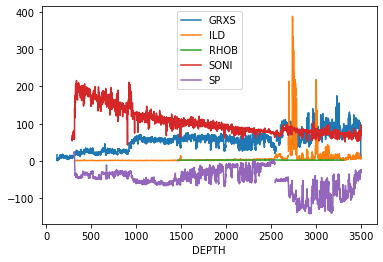

In [52]:
well.plot()

When we look at the plot above, we can see that is not very useful to us as all logging measurements have their own scales.

Lets plot individual curves by supplying a y variable argument like so:

<AxesSubplot:xlabel='DEPTH'>

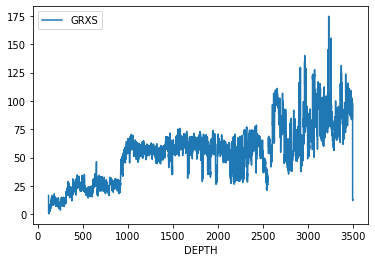

In [53]:
well.plot(y='GRXS')

This allows us to view the Gamma Ray Curve on its own. We can change the variable to any other curve within the dataframe and view it as follows: 

<AxesSubplot:xlabel='DEPTH'>

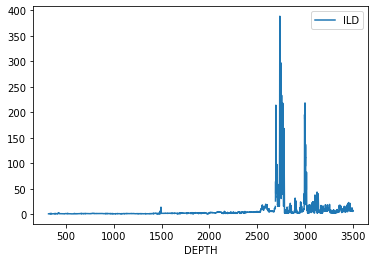

In [54]:
well.plot(y='ILD')

<AxesSubplot:xlabel='DEPTH'>

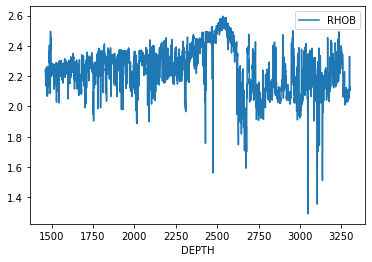

In [55]:
well.plot(y='RHOB')

<AxesSubplot:xlabel='DEPTH'>

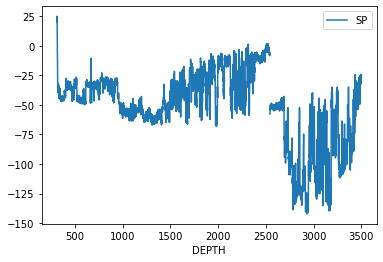

In [56]:
well.plot(y='SP')

<AxesSubplot:xlabel='DEPTH'>

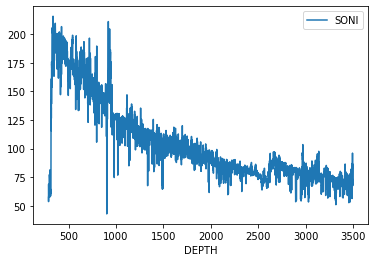

In [57]:
well.plot(y='SONI')